<h3>Import packages

In [1]:
import json
import pandas as pd
import numpy as np
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
import matplotlib.patches as mpatches

<h3>Load match data

In [2]:
line_color = '#c7d5cc'
pitch_color = '#444444'

pitch_length_x = 120
pitch_width_y = 80

match_id = 3869685

with open(f"/open-data-master/data/events/" + str(match_id) + ".json") as f:
    events = json.load(f)

df = pd.json_normalize(events, sep='_')

<h3>Prepare data for visualisation

In [3]:
def prepare_data(df, name):
    passes_df = df[(df.type_name=='Pass') & (df.player_name == name)]
    locations = passes_df.location.values
    end_locations = passes_df.pass_end_location.values
    outcomes = passes_df.pass_outcome_name.values

    return (locations, end_locations, outcomes)

name = 'Lionel Andrés Messi Cuccittini'
locations, end_locations, outcomes = prepare_data(df, name)

<h2>Step by step

<h3>Create pitch

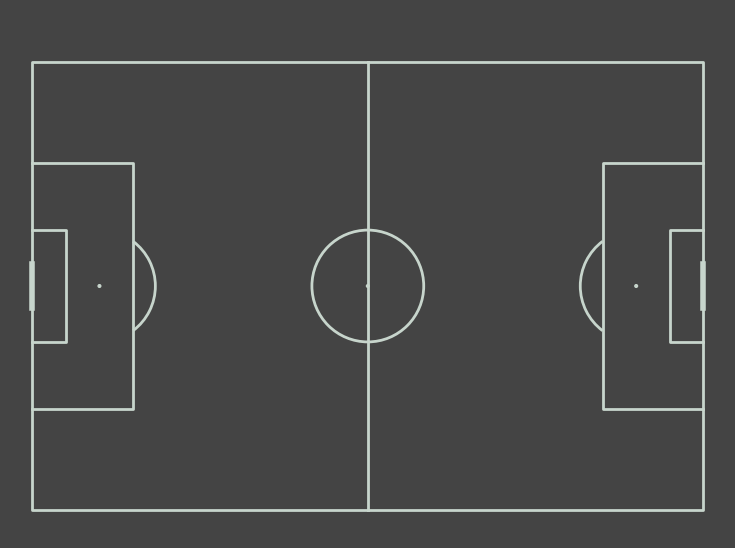

In [4]:
pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color=line_color)
fig, axs = pitch.grid(figheight=6, title_height=0.05, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.01)

fig.set_facecolor(pitch_color)

<h3>Plot passes

In [5]:
def plot_passes(ax, locations, end_locations, outcomes):
    outc_map = {'Incomplete': "firebrick", 'Pass Offside': "firebrick", 'Out': "firebrick", 'Unknown': "firebrick", np.nan:"darkgreen"}

    for loc, end_loc, outc in zip(locations, end_locations, outcomes):
        x = loc[0]
        y = loc[1]
        x_end = end_loc[0]
        y_end = end_loc[1]

        circle_size = 1.5

        circle = plt.Circle((x, y),circle_size, color = outc_map[outc])     
        circle.set_alpha(.5)
        arrow = FancyArrow(x, y, x_end - x, y_end - y, color = outc_map[outc], width=0.3, head_length=3)

        ax.add_patch(circle)
        ax.add_patch(arrow)

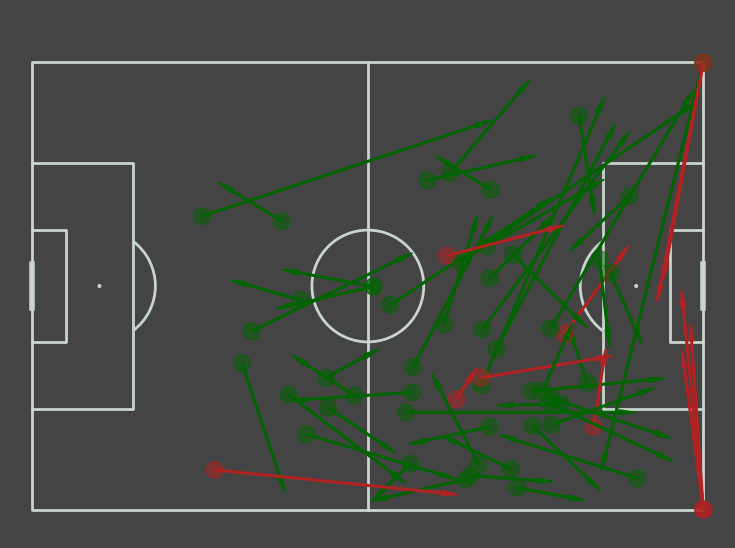

In [6]:
pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color=line_color)
fig, axs = pitch.grid(figheight=6, title_height=0.05, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.01)

fig.set_facecolor(pitch_color)

name = 'Lionel Andrés Messi Cuccittini'
locations, end_locations, outcomes = prepare_data(df, name)

plot_passes(axs['pitch'], locations, end_locations, outcomes)

<h3>Add title

Text(0.5, 0.0, '2022 - Word Cup Final')

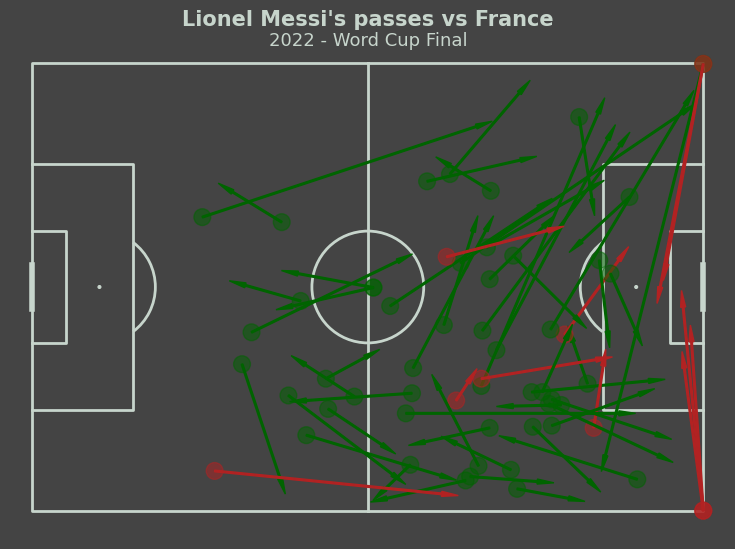

In [7]:
pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color=line_color)
fig, axs = pitch.grid(figheight=6, title_height=0.05, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.01)

fig.set_facecolor(pitch_color)

name = 'Lionel Andrés Messi Cuccittini'
locations, end_locations, outcomes = prepare_data(df, name)

plot_passes(axs['pitch'], locations, end_locations, outcomes)

title = "Lionel Messi's passes vs France"
subtitle = "2022 - Word Cup Final"
axs['title'].text(0.5, 0.7, title, color = line_color, va='center', ha='center', fontsize = 15, fontweight='bold')
axs['title'].text(0.5, 0.0, subtitle, color = line_color, va='center', ha='center', fontsize = 13)

<h3>Add attacking direction

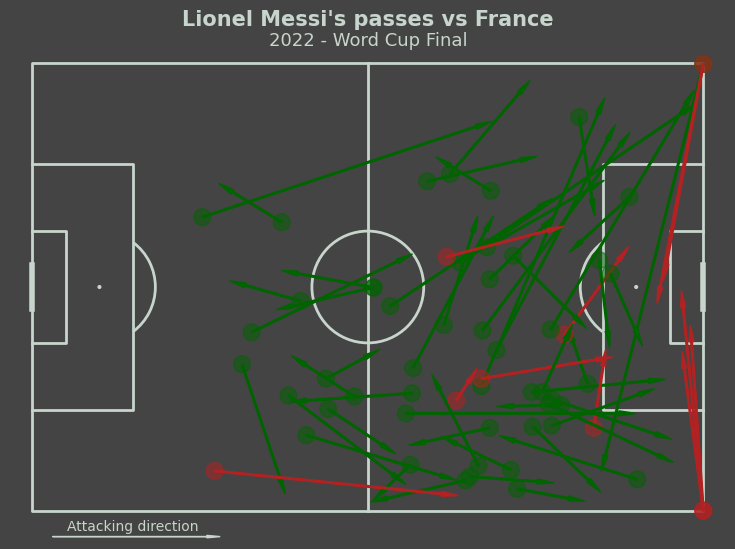

In [8]:
pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color=line_color)
fig, axs = pitch.grid(figheight=6, title_height=0.05, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.01)

fig.set_facecolor(pitch_color)

name = 'Lionel Andrés Messi Cuccittini'
locations, end_locations, outcomes = prepare_data(df, name)

plot_passes(axs['pitch'], locations, end_locations, outcomes)

title = "Lionel Messi's passes vs France"
subtitle = "2022 - Word Cup Final"
axs['title'].text(0.5, 0.7, title, color = line_color, va='center', ha='center', fontsize = 15, fontweight='bold')
axs['title'].text(0.5, 0.0, subtitle, color = line_color, va='center', ha='center', fontsize = 13)

axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)
axs['endnote'].text(0.15, 2, 'Attacking direction', va = 'center', ha = 'center', color = line_color, fontsize = 10)
axs['endnote'].arrow(0.03, 0.4, 0.23, 0, width  = 0.001, head_width = 0.4, head_length = 0.02, ec = line_color, fc = line_color)


<h3>Add legend

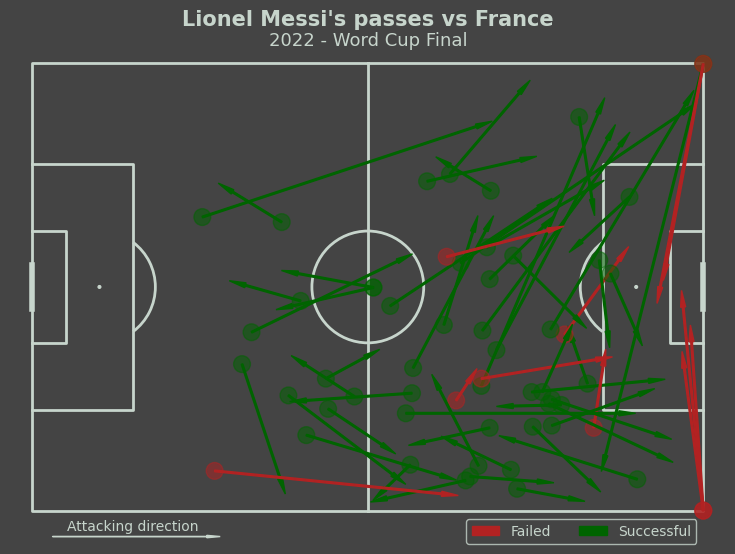

In [9]:
pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color=line_color)
fig, axs = pitch.grid(figheight=6, title_height=0.05, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.01)

fig.set_facecolor(pitch_color)

name = 'Lionel Andrés Messi Cuccittini'
locations, end_locations, outcomes = prepare_data(df, name)

plot_passes(axs['pitch'], locations, end_locations, outcomes)

title = "Lionel Messi's passes vs France"
subtitle = "2022 - Word Cup Final"
axs['title'].text(0.5, 0.7, title, color = line_color, va='center', ha='center', fontsize = 15, fontweight='bold')
axs['title'].text(0.5, 0.0, subtitle, color = line_color, va='center', ha='center', fontsize = 13)

axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)
axs['endnote'].text(0.15, 2, 'Attacking direction', va = 'center', ha = 'center', color = line_color, fontsize = 10)
axs['endnote'].arrow(0.03, 0.4, 0.23, 0, width  = 0.001, head_width = 0.4, head_length = 0.02, ec = line_color, fc = line_color)

inac_patch = mpatches.Patch(color='firebrick', label='Failed')
acc_patch = mpatches.Patch(color='darkgreen', label='Successful')

axs['endnote'].legend(handles = [inac_patch, acc_patch], labelcolor = line_color, facecolor = '#444444',
    edgecolor = line_color, ncol = 2, fontsize = 10, bbox_to_anchor=(0.5, 4, 0.5, 0.5))